In [433]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import cv2

In [434]:
def imprimir_imagen(img, titulo="", dims=(8, 8)):
    """Función que grafica y muestra una imagen con Pyplot de Matplotlib.
    :param img: (numpy array). Imagen que se desea graficar
    :param titulo: (string). Título de la gráfica
    :param dims: (tuple). Tamaño (figsize) del gráfico de Pyplot
    """
    plt.figure(figsize=dims)
    plt.title(titulo)
    plt.imshow(img)

Imagen a procesar

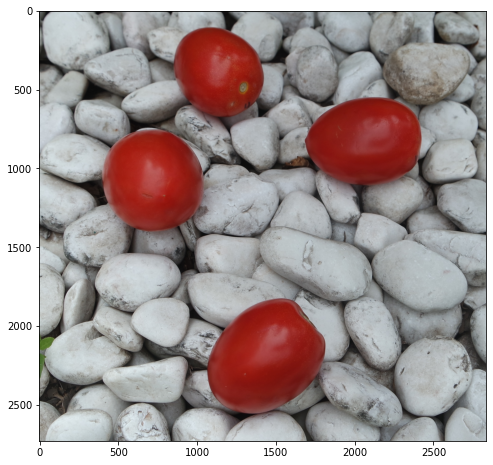

In [435]:
sample_image = cv2.imread('Jit1.JPG')
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)

"""plt.axis('off')
plt.imshow(img)"""
imprimir_imagen(img)

In [436]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

#Segmentacion por color

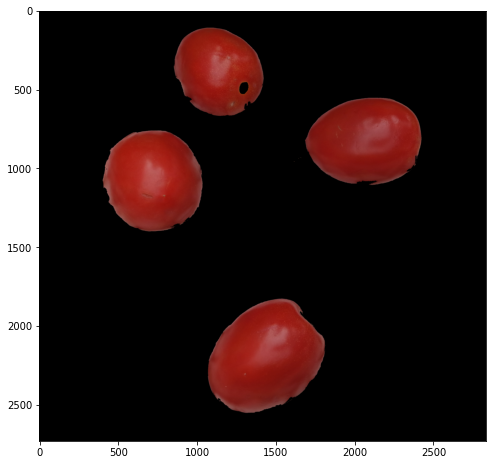

In [437]:
# Elegimos el umbral de rojo en HSV
umbral_bajo1 = (170,100,100)
umbral_alto1 = (179,255,255)
# Elegimos el segundo umbral de rojo en HSV
umbral_bajo2 = (0,100,100)
umbral_alto2 = (10,255,255)
# hacemos la mask y filtramos en la original
mask1 = cv2.inRange(img_hsv, umbral_bajo1, umbral_alto1)
mask2 = cv2.inRange(img_hsv, umbral_bajo2, umbral_alto2)
mask = mask1 + mask2
res = cv2.bitwise_and(img, img, mask=mask)
# imprimimos los resultados

#plt.subplot(1, 2, 1)
#plt.imshow(mask, cmap='gray')
#plt.subplot(1, 2, 2)
imprimir_imagen(res)
#plt.show()

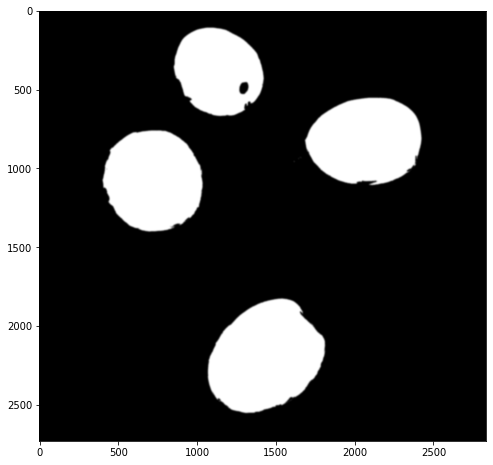

In [453]:
img_blur = cv2.GaussianBlur(mask, (25,25), 0)
plt.figure(figsize=(8,8))
plt.imshow(img_blur, 'gray')

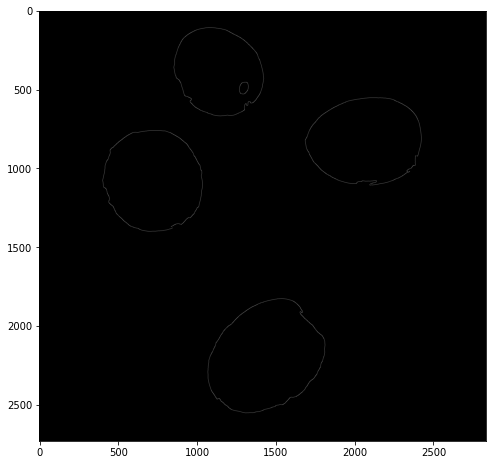

In [466]:
edges = cv2.Canny(img_blur,50,150)
plt.figure(figsize=(8,8))
plt.imshow(edges, 'gray')

#Deteccion de Bordes

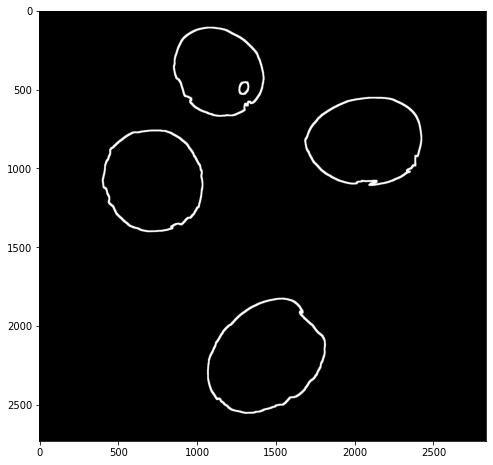

In [469]:
kernel = np.ones((3,3), np.uint8)
dilatacion = cv2.dilate(edges, kernel, iterations = 5)
plt.figure(figsize=(8,8))
plt.imshow(dilatacion, 'gray')

# Encontrar Objetos

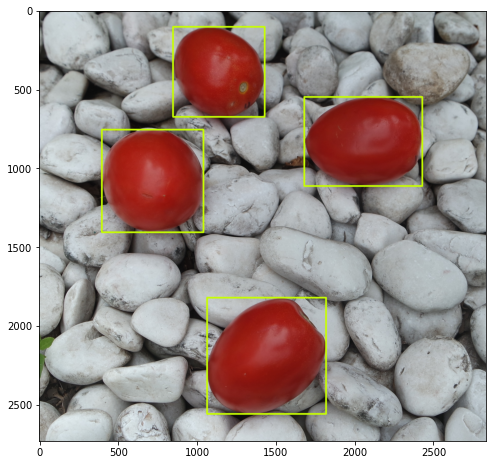

In [471]:
contours,hierarchy = cv2.findContours(dilatacion,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    masked_image = cv2.rectangle(img,(x,y),(x+w,y+h),(200,255,0),10)
plt.figure(figsize =(8,8))
plt.imshow(img)

In [472]:
print("objetos {}".format(len(contours)))

objetos 4


In [473]:
print ('hierarchy=',hierarchy)

hierarchy= [[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [-1  2 -1 -1]]]


In [474]:
cnt=contours[0]
izquierdo_2 = tuple(cnt[cnt[:,:,0].argmin()][0])
derecho_2 = tuple(cnt[cnt[:,:,0].argmax()][0])
superior_2 = tuple(cnt[cnt[:,:,1].argmin()][0])
inferior_2 = tuple(cnt[cnt[:,:,1].argmax()][0])

cnt=contours[1]
izquierdo_3 = tuple(cnt[cnt[:,:,0].argmin()][0])
derecho_3 = tuple(cnt[cnt[:,:,0].argmax()][0])
superior_3 = tuple(cnt[cnt[:,:,1].argmin()][0])
inferior_3 = tuple(cnt[cnt[:,:,1].argmax()][0])

cnt=contours[2]
izquierdo_1 = tuple(cnt[cnt[:,:,0].argmin()][0])
derecho_1 = tuple(cnt[cnt[:,:,0].argmax()][0])
superior_1 = tuple(cnt[cnt[:,:,1].argmin()][0])
inferior_1 = tuple(cnt[cnt[:,:,1].argmax()][0])

cnt=contours[3]
izquierdo_4 = tuple(cnt[cnt[:,:,0].argmin()][0])
derecho_4 = tuple(cnt[cnt[:,:,0].argmax()][0])
superior_4 = tuple(cnt[cnt[:,:,1].argmin()][0])
inferior_4 = tuple(cnt[cnt[:,:,1].argmax()][0])

In [475]:
print("Punto Derecho",derecho_1)
print("Punto izquierdo",izquierdo_1)

Punto Derecho (2428, 831)
Punto izquierdo (1681, 822)


In [476]:
print("Punto Derecho",derecho_2)

print("Punto izquierdo",izquierdo_2)

Punto Derecho (1818, 2127)
Punto izquierdo (1065, 2276)


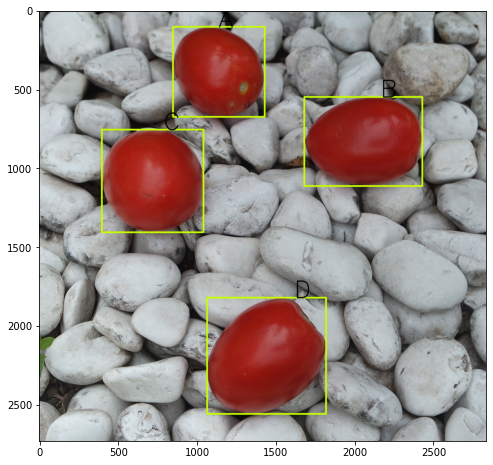

In [478]:
a=(superior_1[0],superior_1[1])
b=(superior_2[0],superior_2[1])
c=(superior_3[0],superior_3[1])
d=(superior_4[0],superior_4[1])

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,' B',a,font,5,(0,0,0),6,cv2.LINE_AA)
cv2.putText(img,' D',b,font,5,(0,0,0),6,cv2.LINE_AA)
cv2.putText(img,' C',c,font,5,(0,0,0),6,cv2.LINE_AA)
cv2.putText(img,' A',d,font,5,(0,0,0),6,cv2.LINE_AA)

imprimir_imagen(img)

In [485]:
def distancia_euclideana(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def dibujar_distancia(image, punto_inicio, punto_final):


  color = (0, 255, 0)
  
  # Line thickness of 9 px
  thickness = 9
  
  # Using cv2.line() method
  # Draw a diagonal green line with thickness of 9 px
  im = cv2.line(image, punto_inicio, punto_final, color, thickness)
  #distancia = distancia_euclideana(punto_inicio, punto_final)
  plt.figure(figsize=(8,8))
  plt.imshow(im)

In [481]:
def producto_cruz1(N, M):
    product = np.cross(N,M)
    return product

def puntos_lineas(a, b, c, inicio =- 100, final = 100, saltos = 10):
  x = np.array(range(inicio, final)) / saltos
  if inicio > final:
    x = np.array(range(final, inicio)) / saltos

  y = (-c-a * x) / b

  return (list(x), list(y))


def producto_cruz(vector_1, vector_2):

    a_1, b_1, c_1 = vector_1
    a_2, b_2, c_2 = vector_2

    x = (b_1 * 1) - (b_2 * 1)
    y = -(a_1 * 1 - a_2 * 1)
    z = a_1 * b_2 - a_2 * b_1

    x = x / z
    y = y / z
    z = z / z
    
    return(x,y,z)


def recta_puntos(a_1, a_2, b_1, b_2):
  
  m1 = (a_1, b_1, 1)
  m2 = (a_2, b_2, 1)

  x, y, z = producto_cruz(m1, m2)
  if b_2 > b_1:
    x,y,z = producto_cruz(m2, m1)

  x_1, y_1 = puntos_lineas(x,y,1,a_1, a_2 + 1, 1)
  print(x_1, y_1)
  print('punto 1', a_1, b_1)
  print('punto 2', a_2, b_2)

  s = 30
  plt.title("Recta que conecta los puntos")
  plt.plot(x_1, y_1)
  plt.scatter(a_1, b_1, s, c = "red")
  plt.scatter(a_2, b_2, s, c = "red")
  plt.title

  return (x_1, y_1)

  pass

In [482]:
a_1, b_1 = izquierdo_1
s_1, sb_1 = superior_1
a_2, b_2 = derecho_1
c_1, d_1 = izquierdo_2
s_2, sb_2 = superior_2
c_2, d_2 = derecho_2

[1065.0, 1066.0, 1067.0, 1068.0, 1069.0, 1070.0, 1071.0, 1072.0, 1073.0, 1074.0, 1075.0, 1076.0, 1077.0, 1078.0, 1079.0, 1080.0, 1081.0, 1082.0, 1083.0, 1084.0, 1085.0, 1086.0, 1087.0, 1088.0, 1089.0, 1090.0, 1091.0, 1092.0, 1093.0, 1094.0, 1095.0, 1096.0, 1097.0, 1098.0, 1099.0, 1100.0, 1101.0, 1102.0, 1103.0, 1104.0, 1105.0, 1106.0, 1107.0, 1108.0, 1109.0, 1110.0, 1111.0, 1112.0, 1113.0, 1114.0, 1115.0, 1116.0, 1117.0, 1118.0, 1119.0, 1120.0, 1121.0, 1122.0, 1123.0, 1124.0, 1125.0, 1126.0, 1127.0, 1128.0, 1129.0, 1130.0, 1131.0, 1132.0, 1133.0, 1134.0, 1135.0, 1136.0, 1137.0, 1138.0, 1139.0, 1140.0, 1141.0, 1142.0, 1143.0, 1144.0, 1145.0, 1146.0, 1147.0, 1148.0, 1149.0, 1150.0, 1151.0, 1152.0, 1153.0, 1154.0, 1155.0, 1156.0, 1157.0, 1158.0, 1159.0, 1160.0, 1161.0, 1162.0, 1163.0, 1164.0, 1165.0, 1166.0, 1167.0, 1168.0, 1169.0, 1170.0, 1171.0, 1172.0, 1173.0, 1174.0, 1175.0, 1176.0, 1177.0, 1178.0, 1179.0, 1180.0, 1181.0, 1182.0, 1183.0, 1184.0, 1185.0, 1186.0, 1187.0, 1188.0, 1189.0,

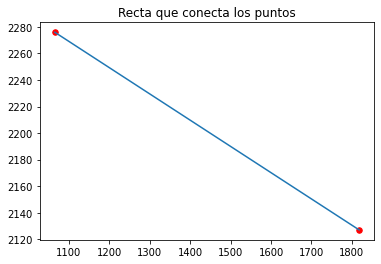

In [483]:
a,b = recta_puntos(c_1, c_2, d_1, d_2)

#Distancia de los objetos B y D

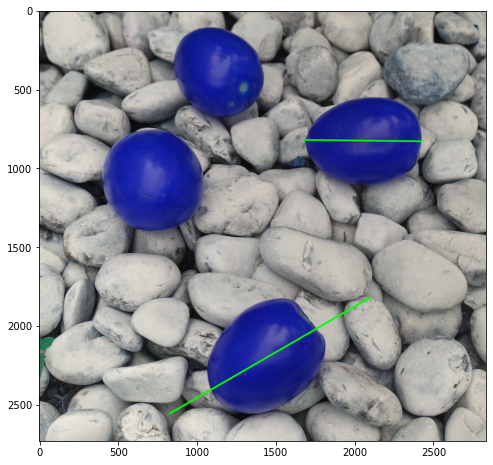

In [487]:
x_2=(izquierdo_1[0],izquierdo_1[1])
y_2=(derecho_1[0],derecho_1[1])

a = inferior_2[0] - izquierdo_2[0]
b = inferior_2[1] - izquierdo_2[1]
xa_1=(a,b)
c = derecho_2[0]-superior_2[0]
d = derecho_2[1]-superior_2[1]
ya_1=(c,d)

x_1=(izquierdo_2[0] - xa_1[0],izquierdo_2[1]+ xa_1[1])
y_1=(derecho_2[0] + ya_1[0],derecho_2[1] - ya_1[1])

dibujar_distancia(sample_image,x_1, y_1)

In [488]:
distancia_euclideana(x_2[0], y_2[0])

747.0

In [489]:
distancia_euclideana(x_1[0], y_1[0])

1272.0